In [ ]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from itertools import product
%matplotlib inline

os.chdir('/data/arpit.goel/32_RecruitRestarauntPrediction/')

air_visit_data=pd.read_csv('01.RawData/air_visit_data.csv',parse_dates=['visit_date'],index_col=['air_store_id'])
air_visit_data.loc[:,'log_visitors']=np.log(1+air_visit_data.loc[:,'visitors'])
train=pd.read_csv('02.CleanData/Master_2017-01-29.csv',index_col=['air_store_id'],parse_dates=['visit_date'])
train=train[train['target'].fillna(1)>1]
test=pd.read_csv('02.CleanData/Master_2017-03-12.csv',index_col=['air_store_id'],parse_dates=['visit_date'])
test=test[test['target'].fillna(1)>1]
missing_vals=train.mean()
train=train.fillna(missing_vals)
test=test.fillna(missing_vals)

In [ ]:
from sklearn.linear_model import LinearRegression
idv=['last_7','overall_mean','rolling_mean','rolling_median','last_year_364','reserve_store_2','reserve_all_2']
reg=LinearRegression()
reg.fit(train[idv],train['target'])
test['predict']=reg.predict(test[idv])
test['error']=np.square(test['predict']-test['target'])
errors=test.groupby(test.index)['error'].mean()

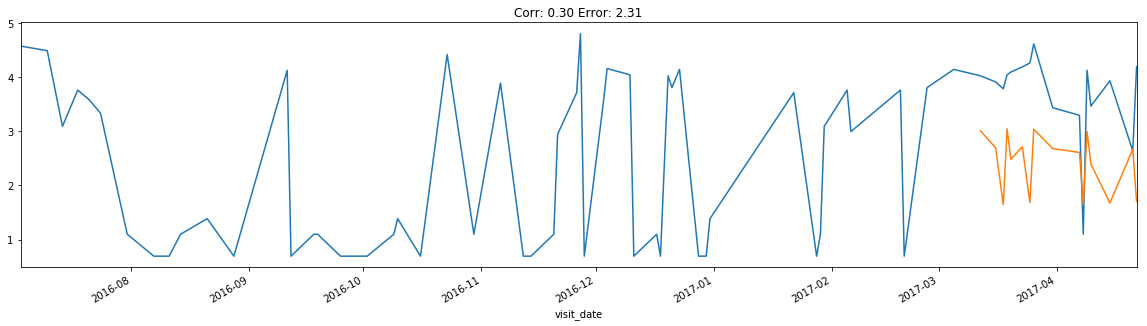

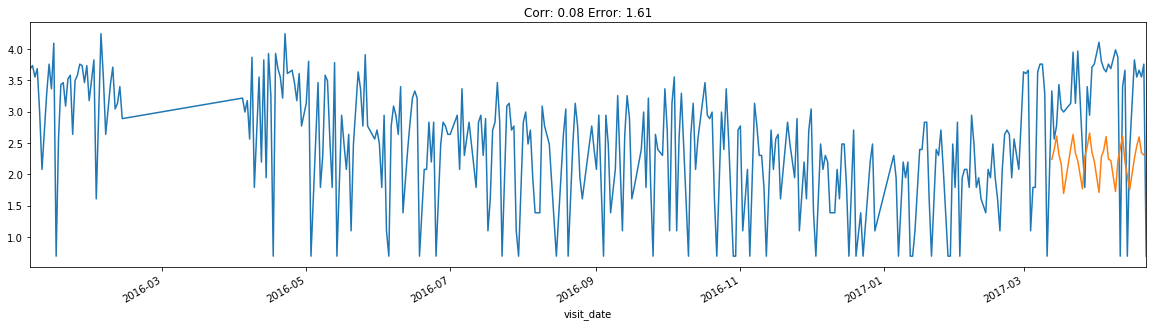

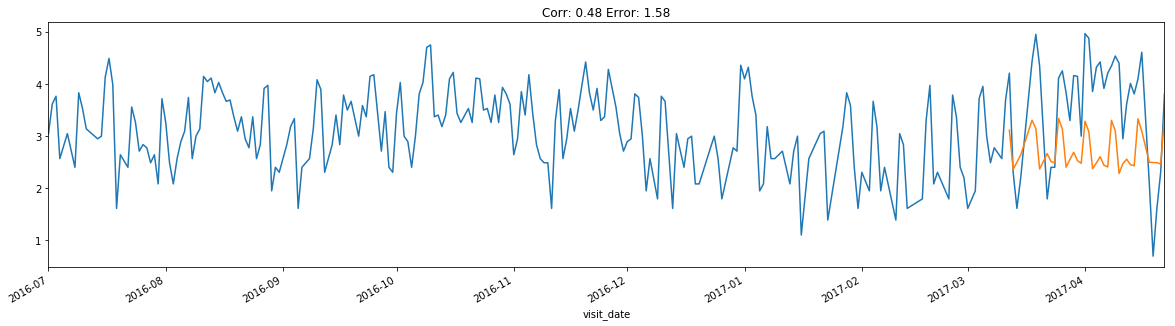

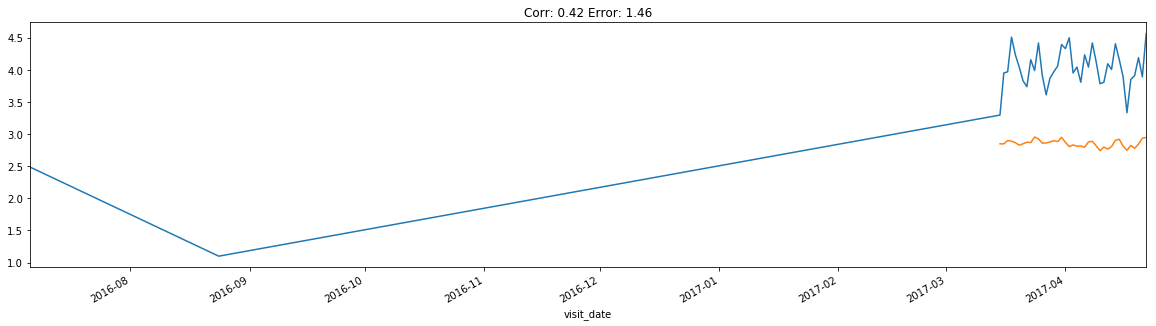

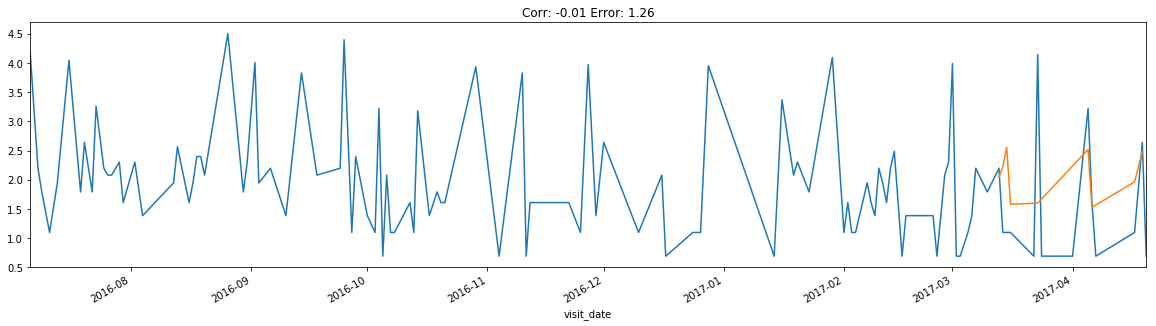

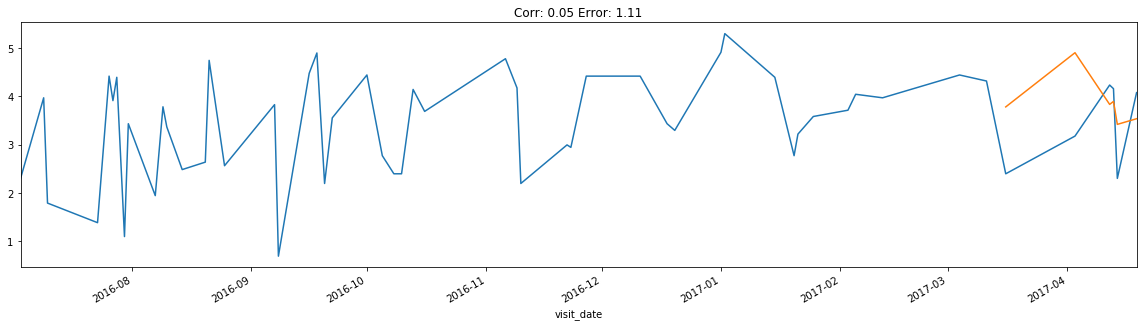

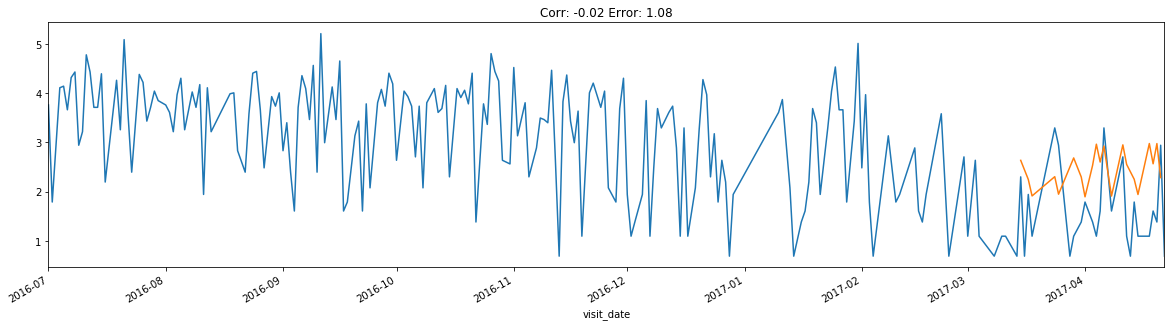

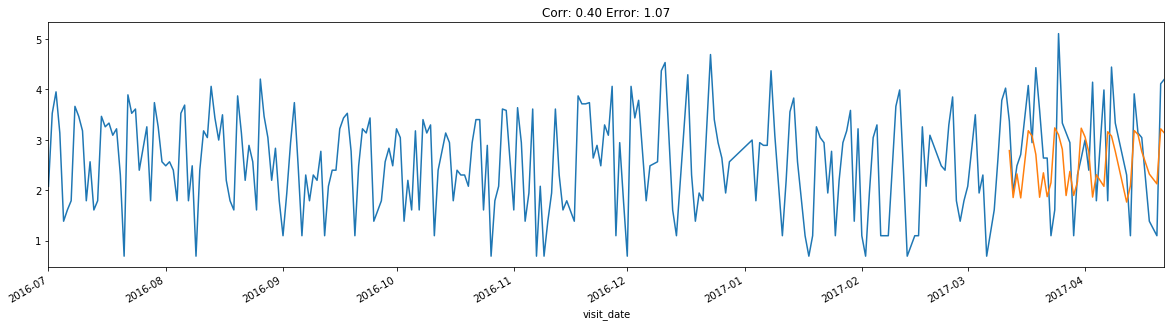

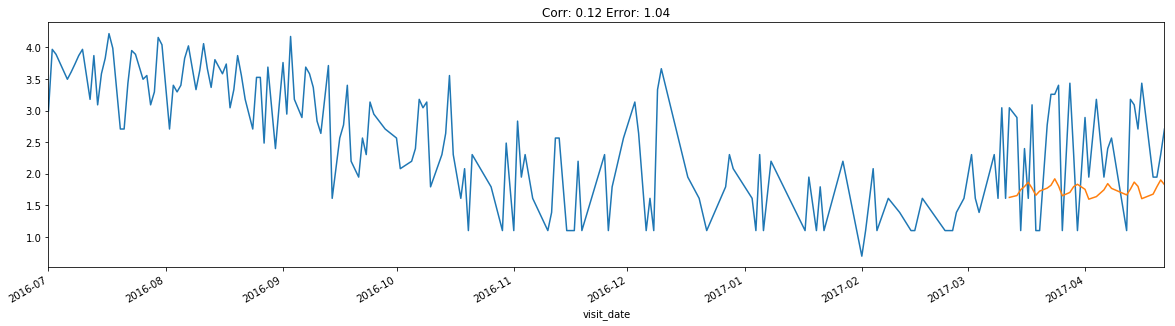

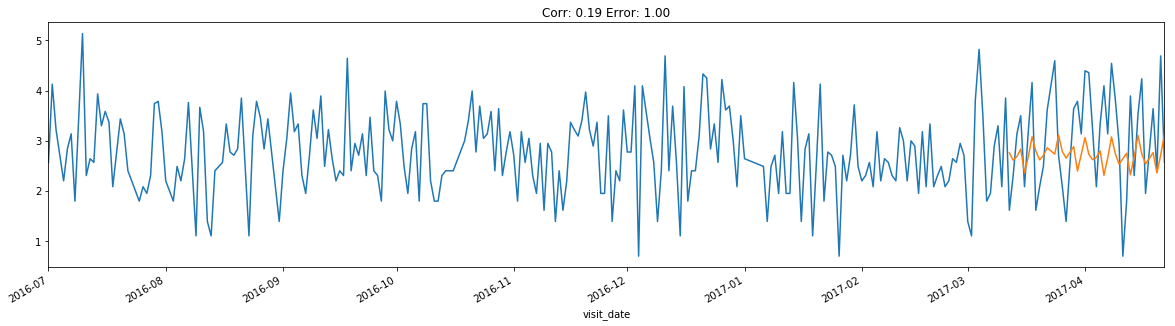

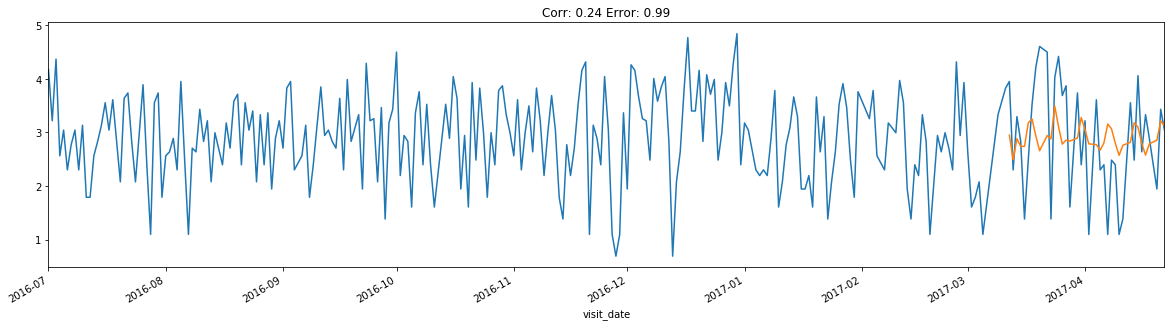

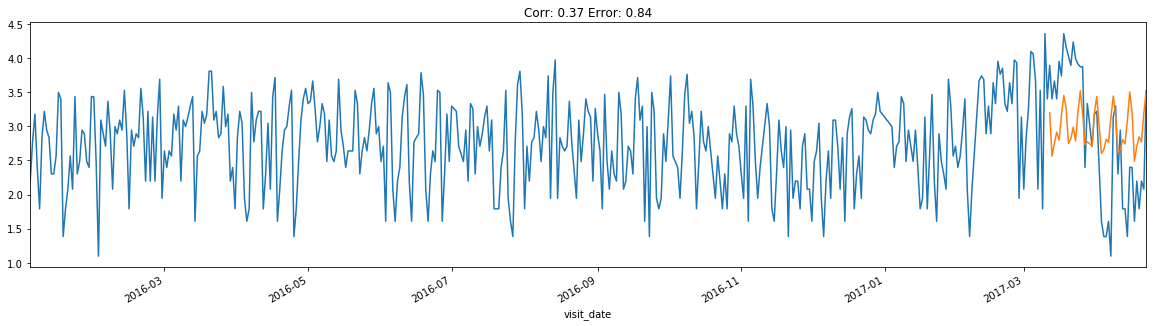

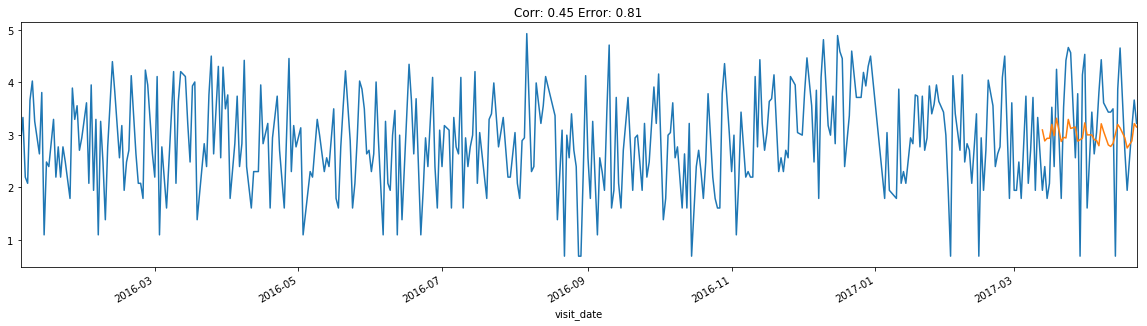

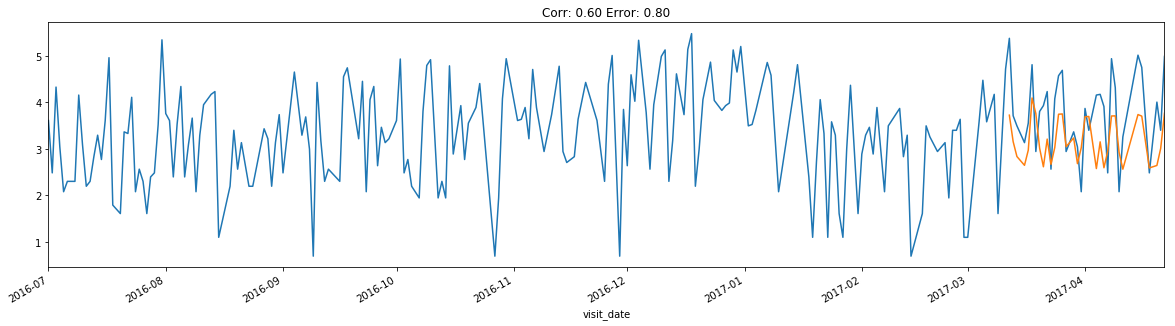

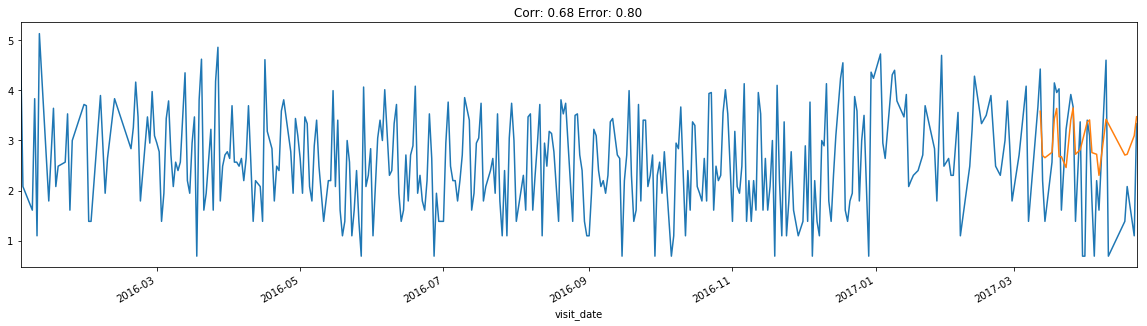

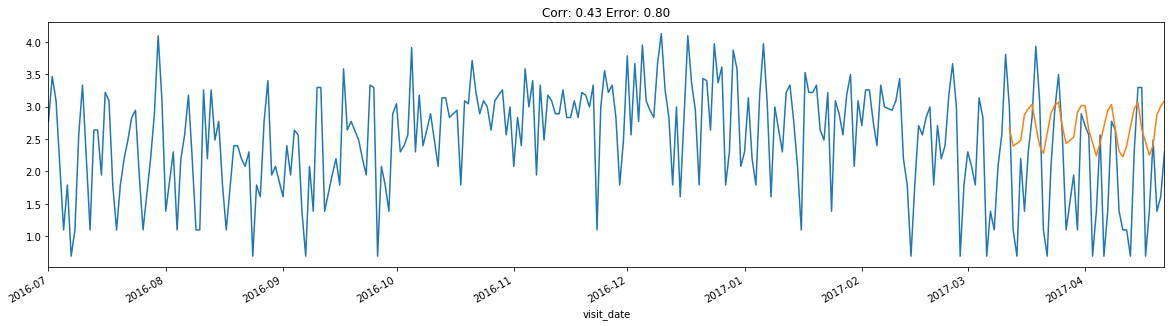

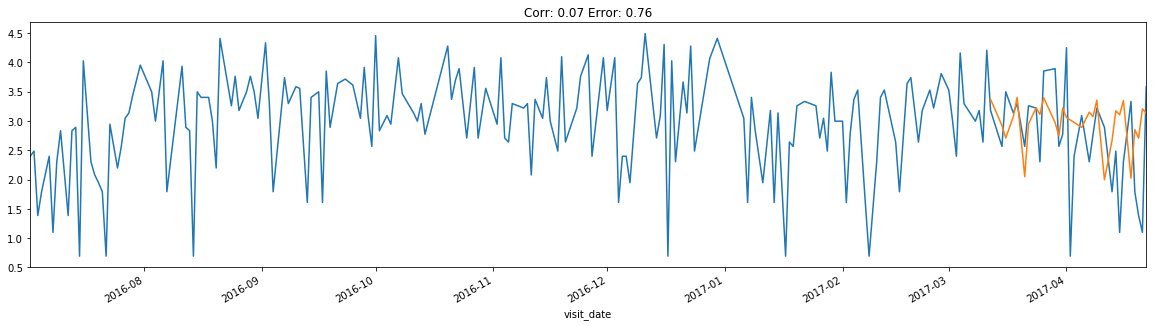

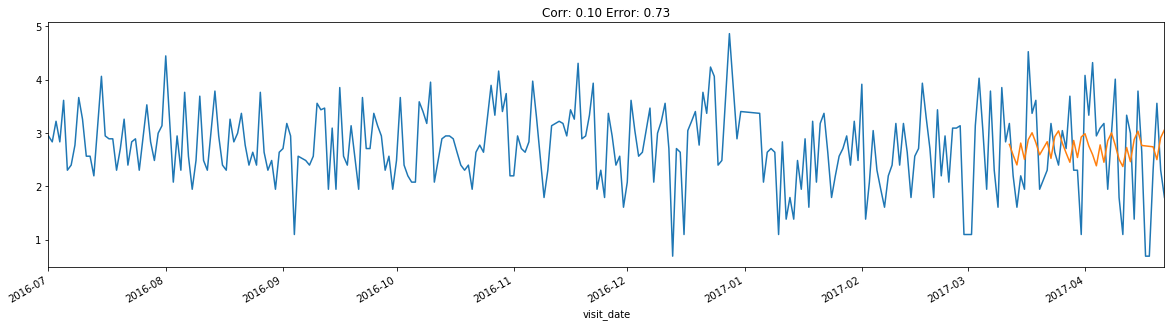

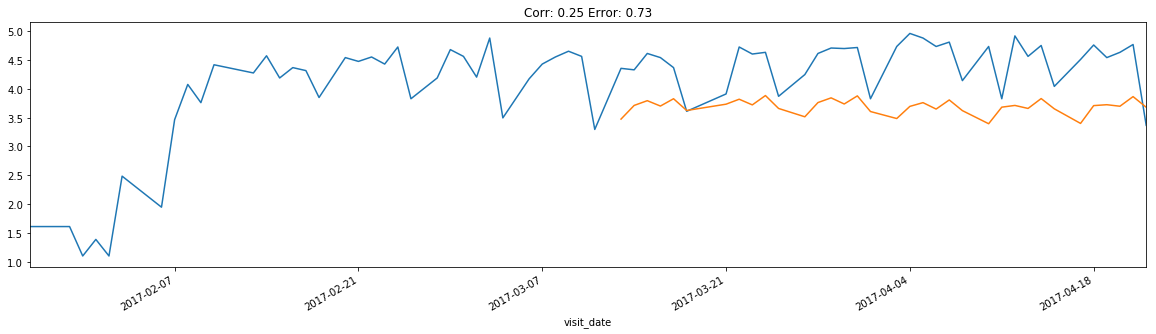

In [5]:
for id in errors.sort_values(ascending=False).iloc[1:20].index:
    ts=air_visit_data.loc[id,:]
    ts.index=ts['visit_date']
    plt.figure(figsize=(20,5))
    ts['log_visitors'].plot()
    ts=test.loc[id,:]
    ts.index=ts['visit_date']
    ts['predict'].plot()
    plt.title('Corr: %0.2f Error: %0.2f'%(test.loc[id,:][['predict','target']].corr().iloc[0,1],errors[id]))
    